In [3]:
#Initials
import math 

def R0(Pc,dp):
   dc = (Pc/k)**(1/GA)
   P = Pc - dp 
   #d = dc**(1- GA) - dp/(k*GA*((P/k)**((1- GA)/GA)))**(1/(1- GA))
   return  ((3/(2*pi*(3*Pc + dc)))*(math.log(((dc + Pc)/((P/k)**(1/GA) + P)))))**(0.5)

def M0(Pc,dp):
    dc = (Pc/k)**(1/GA)
    P = Pc - dp 
    #d = dc - dp/(k*GA*(d**(1- GA)))
    return (math.log((dc + Pc)/((P/k)**(1/GA) + P)))*(2*dc/(3*Pc + dc))*((3/(2*pi*(3*Pc + dc)))*(math.log((dc + Pc)/((P/k)**(1/GA) + P))))
    

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.3164828828829D-38   r2 =                  NaN


/tmp/ipykernel_18513/1156315096.py:20: RuntimeWarning: invalid value encountered in scalar divide
  dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
/tmp/ipykernel_18513/1156315096.py:21: RuntimeWarning: invalid value encountered in scalar divide
  drdp = (2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))


Text(0, 0.5, 'm (kg)')

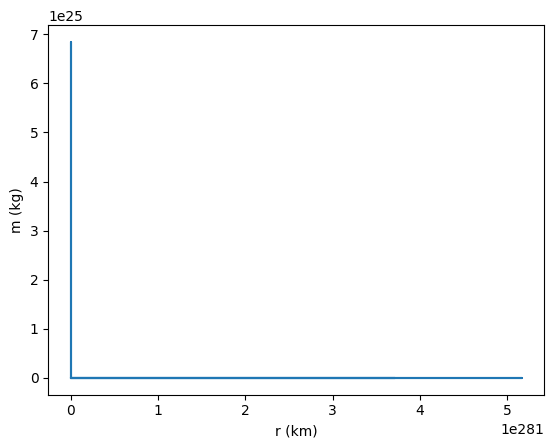

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

G = 1
k = 2
c = 1
GA = 0.5
pi = math.pi

#Units conversion to Gev/fm^3
C1 = 10.55*(10**(-15))
K1 = (18.18)*(10**(10)) * C1


def f(x,P):
   m,r = x
   d = (P/k)**(1/GA)
   dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
   drdp = (2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
   return [dmdp , drdp]

#Conversion2 pascal to GeV\fm^3
C2 = (1.98)*(10**(-73))

#Initials
Ro =  R0(Pc = (1.6*(10**34))*C2,  dp = (10**(-10))*C2)
Mo =  M0(Pc = (1.6*(10**34))*C2,  dp = ((10**(-10))*C2))

x0 = [Mo,Ro]

#P0 = Pc- dp
P0 = 1.6*(10**34)*C2 - 10**(-6)*C2

P = np.linspace(P0,0,10**3)

solve = odeint(f,x0, P)

m =solve[:,0]
r = solve[:,1]

plot.plot(m,r)
plot.xlabel("r (km)")
plot.ylabel("m (kg)")
#plot.ylim(0,0.25*10**-6)
